<a href="https://www.kaggle.com/code/thikhuyenle/combination-of-cnn-lstm-for-text-classification?scriptVersionId=118020487" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**In this project, we are going to build and train a simple neural network model which combine Conv1D and LSTM to for text classification**

**The dataset consists of 50.000 movie reviews, and includes 2 groups: positive and negative**

https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

## Table of content

### [I. Data preparation](#Data_preparation)
**[1. Data loading](#Data_loading)**

**[2. Text cleaning](#Text_cleaning)**
- Removing url
- Removing html
- Removing punctuations
- Removing special characters
- Removing emojis 
- Lower text

**[3. Data processing](#Data_processing)**
- Train/val/test splitting
- Tokenization
- Convert texts to sequences 
- Sequence padding 

### [II. Build and train the model](#Build_and_train_model)


### [III. Test the model on unseen dataset](#Prediction_on_unseen_dataset)

______________________________________________________________________________________________________________________

<a name = 'data_preparation'></a>
## I. Data preparation

<a name = 'data_loading'></a>
### 1. Data loading


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive




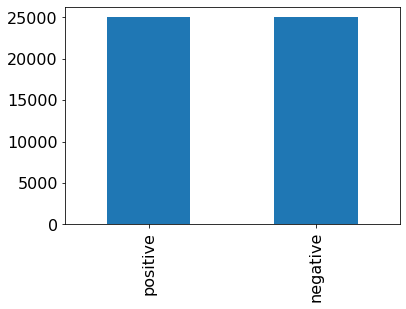

In [1]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':16})

data_path = '/kaggle/input/imdb-dataset-of-50k-movie-reviews/'

data = pd.read_csv(data_path + 'IMDB Dataset.csv')

# display the first 5 rows of data
print()
print(data.head(5))

print('\n')
plt.figure(figsize = (6,4))
data['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

The dataset consists of two groups: 
+ 25000 positive reviews 
+ 25000 positive reviews

**Visualize word cloud of random positive and negative review**

Positive review:  ... so what's in those missing 10 minutes that were so horrible they had to cut them out from the original film? We were three years into the film production code... Barbara Stanwyck had starred in the original play, but here, Carole Lombard plays Maggie King. Co star Fred MacMurray is probably best known for "Double Indemnity", with Stanwyck, as well as his hit TV show "My Three Sons". Keep an eye out for a young Dorothy Lamour (Bob Hope movies) and the too-fabulous Franklin Pangborn, who spiced up just about every film put on tape. Of course, he works in the beauty salon on the ship! Add the sublime Charles Butterworth and Anthony Quinn. Good timing and clever banter at the beginning. Maggie's buddy Ella is played by Jean Dixon, who was the best friend in "Holiday" and "My Man Godfrey". In "Swing High", Maggie the tourist meets a soldier who is leaving the army. Maggie misses her boat when it leaves port and gets tangled up with the soldier. The dashing 20-something

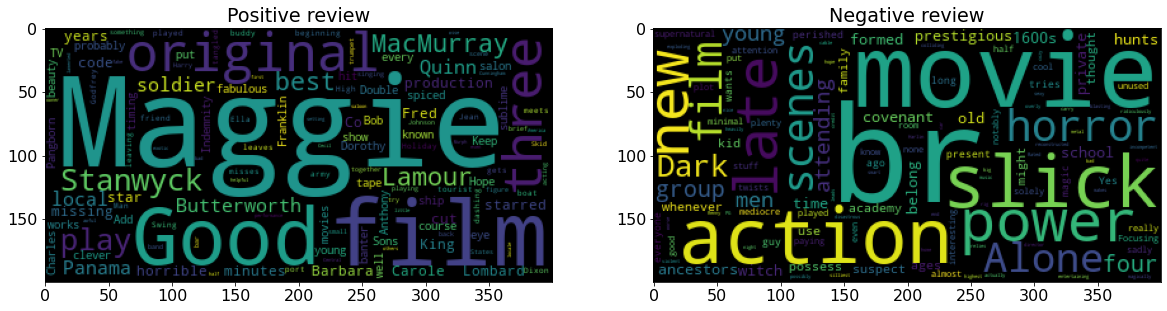

In [2]:
# Choose randomly a positive review and a negative review
ind_positive = random.choice(list(data[data['sentiment'] == 'positive'].index))
ind_negative = random.choice(list(data[data['sentiment'] == 'negative'].index))

review_positive = data['review'][ind_positive]
review_negative = data['review'][ind_negative]

print('Positive review: ', review_positive)
print('\n')
print('Negative review: ', review_negative)
print('\n')

from wordcloud import WordCloud
cloud_positive = WordCloud().generate(review_positive)
cloud_negative = WordCloud().generate(review_negative)

plt.figure(figsize = (20,15))
plt.subplot(1,2,1)
plt.imshow(cloud_positive)
plt.title('Positive review')

plt.subplot(1,2,2)
plt.imshow(cloud_negative)
plt.title('Negative review')
plt.show()

<a name = 'text_cleaning'></a>
### 2. Text cleaning

In [3]:
import re

def remove_url(text):
    url_tag = re.compile(r'https://\S+|www\.\S+')
    text = url_tag.sub(r'', text)
    return text

def remove_html(text):
    html_tag = re.compile(r'<.*?>')
    text = html_tag.sub(r'', text)
    return text

def remove_punctuation(text): 
    punct_tag = re.compile(r'[^\w\s]')
    text = punct_tag.sub(r'', text) 
    return text

def remove_special_character(text):
    special_tag = re.compile(r'[^a-zA-Z0-9\s]')
    text = special_tag.sub(r'', text)
    return text

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text    
    
def clean_text(text):
    text = remove_url(text)
    text = remove_html(text)
    text = remove_punctuation(text)
    text = remove_special_character(text)
    text = remove_emojis(text)
    text = text.lower()
    
    return text

In [4]:
data['processed'] = data['review'].apply(lambda x: clean_text(x))
data.head()

,review,sentiment,processed
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


### 3. Data processing

Firstly, we devide the data into train, validation and test sets with the corresponding proportions are 70%, 20%, 10%

In [5]:
data['Label'] = data['sentiment'].apply(lambda x: 0 if x == 'negative' else 1)

data_0 = data[data['Label'] == 0]
data_1 = data[data['Label'] == 1]

train_size = int(0.7*25000)
val_size = int(0.2*25000)

data_train = pd.concat((data_0[:train_size], data_1[:train_size]), axis = 0)
data_val = pd.concat((data_0[train_size: (train_size + val_size)], data_1[train_size:(train_size + val_size)]), axis = 0)
data_test = pd.concat((data_0[(train_size + val_size):], data_1[(train_size + val_size):]), axis = 0)

X_train, y_train = list(data_train['processed']), np.array(data_train['Label'])
X_val, y_val = list(data_val['processed']), np.array(data_val['Label'])
X_test, y_test = list(data_test['processed']), np.array(data_test['Label'])

print('Train size:', len(X_train))
print('Validation size: ', len(X_val))
print('Test size: ', len(X_test))

Train size: 35000
Validation size:  10000
Test size:  5000


In [6]:
vocab_size = 10000
max_length = 500
trunc_type = 'post'
oov_tok = 'OOV'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization
token = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
token.fit_on_texts(X_train)
index_word = token.index_word

# Convert texts to sequences
train_seq = token.texts_to_sequences(X_train)
val_seq = token.texts_to_sequences(X_val)
test_seq = token.texts_to_sequences(X_test)

# Sequence padding
#Since the sequences have different lengtht, then we use padding method to put all sequences to the same length. 
#The parameter "maxlen" sets the maximum length of the output sequence. 
#    + If length of the input sequence is larger than "maxlen", then it is trunced to keep only #maxlen words, (truncating = 'pre': keep the previous part of the sequence; truncating = 'post': keep the posterior part of the sequence).
#    + If length of the input sequence is smaller than "maxlen", then 0 elements will be padded into the previous part of sequence (if padding = 'pre' - by defaut) or in the tail of the sequence (if padding = 'post').

train_pad = pad_sequences(train_seq, maxlen = max_length, padding = 'post', truncating = trunc_type)
val_pad = pad_sequences(val_seq, maxlen = max_length, padding = 'post', truncating = trunc_type)
test_pad = pad_sequences(test_seq, maxlen = max_length, padding = 'post', truncating = trunc_type)


In [7]:
# Shuffle the training set
p = np.random.permutation(len(train_pad))
train_pad = train_pad[p]
y_train = y_train[p]

## II. Build and train the model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, AveragePooling1D, Bidirectional, LSTM, Dense
from tensorflow.keras.utils import plot_model

embedding_dim = 64

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length = max_length))
model.add(Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(AveragePooling1D(pool_size = 2))
model.add(Bidirectional(LSTM(200, dropout = 0.5)))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

plot_model(model, show_shapes = True)

H = model.fit(train_pad, y_train, epochs = 10, batch_size = 128,
             validation_data = (val_pad, y_val) )

2023-02-02 11:37:52.227466: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-02 11:37:52.318312: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-02 11:37:52.319153: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-02 11:37:52.320979: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/10


2023-02-02 11:38:00.266440: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


274/274 [==============================] - 28s 65ms/step - loss: 0.4887 - accuracy: 0.7445 - val_loss: 0.3414 - val_accuracy: 0.8616
Epoch 2/10
274/274 [==============================] - 17s 63ms/step - loss: 0.2657 - accuracy: 0.8962 - val_loss: 0.2900 - val_accuracy: 0.8857
Epoch 3/10
274/274 [==============================] - 17s 62ms/step - loss: 0.2089 - accuracy: 0.9223 - val_loss: 0.2811 - val_accuracy: 0.8951
Epoch 4/10
274/274 [==============================] - 17s 62ms/step - loss: 0.1674 - accuracy: 0.9407 - val_loss: 0.2911 - val_accuracy: 0.8881
Epoch 5/10
274/274 [==============================] - 17s 62ms/step - loss: 0.1502 - accuracy: 0.9470 - val_loss: 0.3108 - val_accuracy: 0.8877
Epoch 6/10
274/274 [==============================] - 17s 62ms/step - loss: 0.1380 - accuracy: 0.9517 - val_loss: 0.3336 - val_accuracy: 0.8823
Epoch 7/10
274/274 [==============================] - 17s 62ms/step - loss: 0.1196 - accuracy: 0.9601 - val_loss: 0.3471 - val_accuracy: 0.8814
Epo

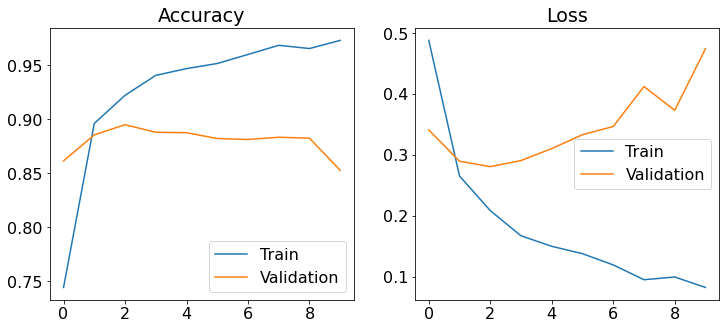

In [9]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(H.history['accuracy'], label = 'Train')
plt.plot(H.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(H.history['loss'], label = 'Train')
plt.plot(H.history['val_loss'], label = 'Validation')
plt.legend()
plt.title('Loss')

plt.show()

<a name = 'Test_the_model'></a>
### III. Test the model on unseen dataset 

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      2500
           1       0.93      0.75      0.83      2500

    accuracy                           0.85      5000
   macro avg       0.86      0.85      0.85      5000
weighted avg       0.86      0.85      0.85      5000



Balanced accuracy score:  0.85




<Figure size 360x360 with 0 Axes>

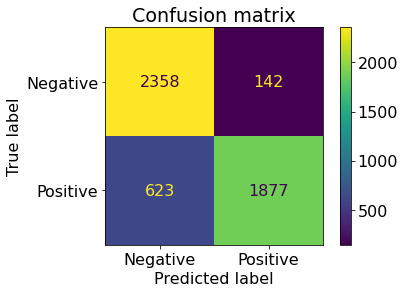

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
y_pred_proba = model.predict(test_pad)
y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])

print(classification_report(y_test, y_pred))

print('\n')

print('Balanced accuracy score: ', np.round(balanced_accuracy_score(y_test, y_pred), 2))

print('\n')
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Negative', 'Positive'])
plt.figure(figsize = (5,5))
cm.plot()
plt.title('Confusion matrix')
plt.show()


### IV. Conclusion 

In this project, we have discovered how to build and train a simple neural network for text classification problem, as well as how to prepare text files to feed into the model. 

The accuracies of this model on the training set is 97%, on the validation set is 88% and 88.4% on the test set. 

There are several ideas that you can try to improve the model performance as: 
+ change dimension of the embedding layer 
+ change hyperparameter values as number of neurons in LSTM layer
+ add more percentage of dropout 
... 
Besides, as the text data was processed to convert into structured data, hence you can also try some robust machine learning model like SVM, Random Forest, Gradient boosting classifier, ... to train on this data. 


**Please upvote if you see this project useful, that will give me more motivation. Thank you!** 